# Nama : Bima Gusti Syauqi

# Nim : 09011281823077

Rain Forecasting pada Artificial Neural Network

sumber : https://www.kaggle.com/fatmakursun/rain-forecasting-with-artificial-neural-network

Pada kernel ini akan memprediksi cuaca hujan dengan memakai algoritma keras

![](http://icdn5.digitaltrends.com/image/artificial_neural_network_1-791x388.jpg)

In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os
print(os.listdir("C:/Users/Admin Asus/Documents/ann"))

# Any results you write to the current directory are saved as output.

['.ipynb_checkpoints', 'rain-forecasting-with-artificial-neural-network.ipynb', 'seattleWeather_1948-2017.csv']


In [3]:
df= pd.read_csv('C:/Users/Admin Asus/Documents/ann/seattleWeather_1948-2017.csv')

In [4]:
df.head()

,DATE,PRCP,TMAX,TMIN,RAIN
0,1948-01-01,0.47,51,42,True
1,1948-01-02,0.59,45,36,True
2,1948-01-03,0.42,45,35,True
3,1948-01-04,0.31,45,34,True
4,1948-01-05,0.17,45,32,True


# EDA

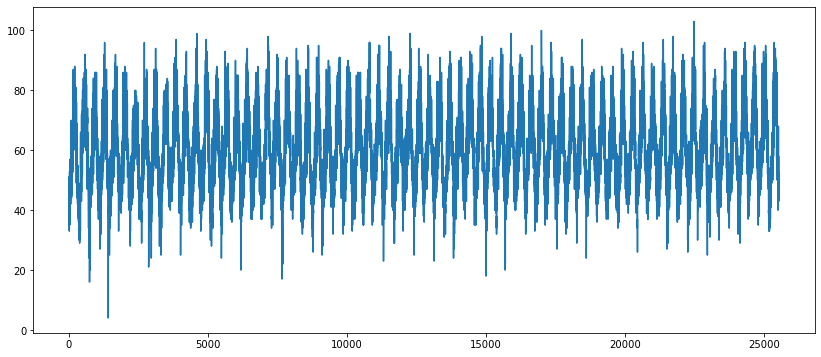

In [5]:
plt.figure(figsize=(14,6))
df['TMAX'].plot()

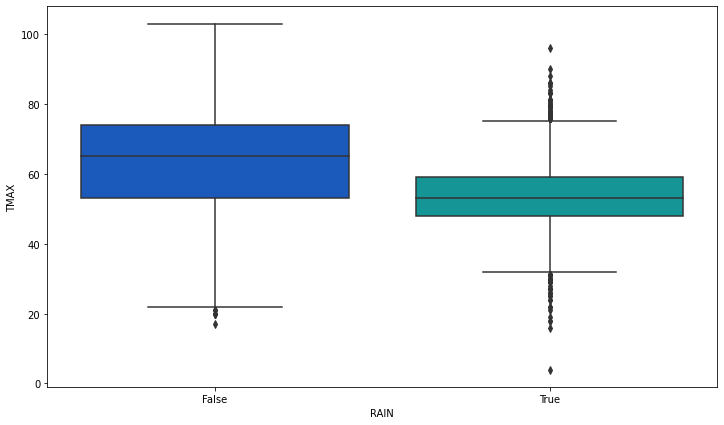

In [6]:
plt.figure(figsize=(12, 7))
sns.boxplot(x='RAIN',y='TMAX',data=df,palette='winter')

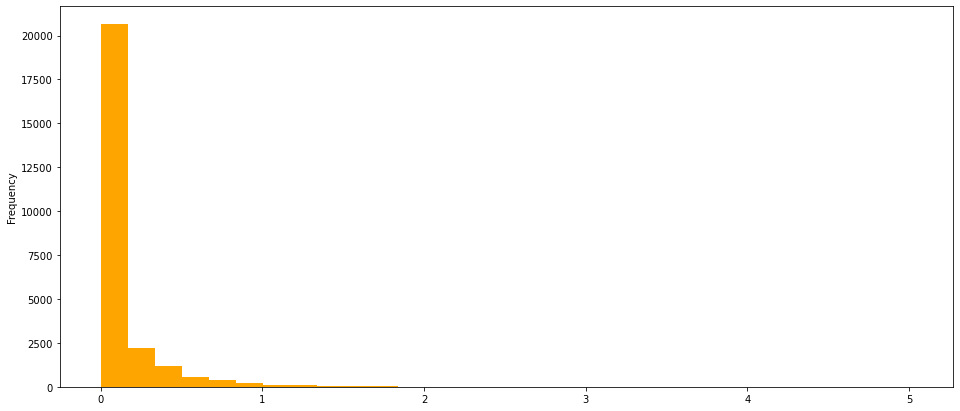

In [7]:
df['PRCP'].plot(kind='hist',bins=30,color='orange',figsize= (16,7))

Kita akan mengkonversikan kolom hujan menjadi numerik untuk ann

In [8]:
df['rain']=[1 if i==True else 0 for i in df['RAIN']]

In [9]:
from sklearn.model_selection import train_test_split

In [10]:
df.columns

Index(['DATE', 'PRCP', 'TMAX', 'TMIN', 'RAIN', 'rain'], dtype='object')

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25551 entries, 0 to 25550
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   DATE    25551 non-null  object 
 1   PRCP    25548 non-null  float64
 2   TMAX    25551 non-null  int64  
 3   TMIN    25551 non-null  int64  
 4   RAIN    25548 non-null  object 
 5   rain    25551 non-null  int64  
dtypes: float64(1), int64(3), object(2)
memory usage: 1.2+ MB


In [12]:
df.dropna(inplace=True)

In [13]:
X=df[['PRCP', 'TMAX', 'TMIN']]
y=df[['rain']]

In [14]:
xtrain,xtest,ytrain,ytest=train_test_split(X,y,test_size=0.2, random_state=41)

Kita akan melakukan normalisasi ke nilai X..

In [15]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
xtrain = scaler.fit_transform(xtrain)
xtest = scaler.transform(xtest)

Kita akan membuat model ann.

In [1]:
import keras 
from keras.layers import Dense
from keras.models import Sequential

Using TensorFlow backend.
D:\Anaconda 2.0\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
D:\Anaconda 2.0\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
D:\Anaconda 2.0\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
D:\Anaconda 2.0\lib\site-packages\tensorflow\python\framework\dtypes.py:519: FutureWarning: Passing (type, 

In [2]:
ann  = Sequential()
ann.add(Dense(units= 32,init= 'uniform', activation = 'relu', input_dim=3))
ann.add(Dense(units= 16,init= 'uniform', activation = 'relu'))
ann.add(Dense(units= 1,init= 'uniform', activation = 'sigmoid'))
ann.compile(optimizer='adam',
              loss='mean_squared_error',
              metrics=['accuracy'])

D:\Anaconda 2.0\lib\site-packages\ipykernel_launcher.py:2: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(units=32, activation="relu", input_dim=3, kernel_initializer="uniform")`
  
D:\Anaconda 2.0\lib\site-packages\ipykernel_launcher.py:3: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(units=16, activation="relu", kernel_initializer="uniform")`
  This is separate from the ipykernel package so we can avoid doing imports until
D:\Anaconda 2.0\lib\site-packages\ipykernel_launcher.py:4: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(units=1, activation="sigmoid", kernel_initializer="uniform")`
  after removing the cwd from sys.path.


In [3]:
ann.fit(xtrain,ytrain, batch_size=10, nb_epoch=10,verbose= 1)

NameError: name 'xtrain' is not defined

In [ ]:
Y_pred = ann.predict(xtest)
Y_pred = [ 1 if y>=0.5 else 0 for y in Y_pred]
print(Y_pred)

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(ytest, Y_pred)
print(cm)

# It's Great !